<a href="https://colab.research.google.com/github/abhilashhn1993/Sentiment_Analysis_of_Tweets/blob/master/TweetExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install GetOldTweets3 python library**

In [5]:
!pip install GetoldTweets3

Importing libraries

In [0]:
import GetOldTweets3 as got
import re
import string
import pandas as pd
import numpy as np
import datetime
import os


Obtaining tweets based on keyword search

In [0]:

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with PTSD today')\
                                           .setSince("2020-01-01")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(1000)\
                                           .setLang('en')
tweet = got.manager.TweetManager.getTweets(tweetCriteria)


In [0]:
len(tweet)

103

**Saving the tweets into an excel file**

In [0]:
import csv
with open('/content/tweets_latest.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'handle', 'loc']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.date, 'handle': i.id, 'loc' : i.geo })
  

In [0]:

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with PTSD today')\
                                           .setSince("2019-08-08")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(1000)\
                                           .setLang('en')
tweet3 = got.manager.TweetManager.getTweets(tweetCriteria)


In [0]:
len(tweet2)

259

In [0]:
import csv
with open('/content/tweets2.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'hashtags']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet2:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.formatted_date, 'hashtags': i.hashtags  })

**Extracting Tweets based on usernames**

Using a list "batch" to append all the usernames and extract the tweets from their account

In [0]:
batch = [['@radymitsy', '2019-02-10', '2020-02-10'],
	['@Shay_Reynolds15', '2019-03-12', '2020-03-12']]

In [0]:
#To import the users tweeets into a CSV file
import csv
with open('/content/tweets_FromUsers.csv', 'a') as csvFile:
  fieldnames = ['Tweets', 'Username', 'date']
  writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
  writer.writeheader()
  for i in batch :
      tweetCriteria = got.manager.TweetCriteria().setUsername(i[0])\
                                    .setSince(i[1])\
                                    .setUntil(i[2])\
                                    .setMaxTweets(5000)\
                                    .setLang('en')
      tweet = got.manager.TweetManager.getTweets(tweetCriteria)
      # outF = open("/content/tweets_FromUsers.csv", "a")
      for j in tweet:
            
          # write line to output file
          writer.writerow({'Username': j.username, 'Tweets': j.text,'date': j.formatted_date })

**Performing word Cloud Analysis on the tweets**

In [0]:
import io
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PTSD_PreDiagnosis.csv']))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tweets_PTSD_PostDiagnosis.csv to tweets_PTSD_PostDiagnosis.csv


In [0]:
import io
df_post = pd.read_csv(io.BytesIO(uploaded['tweets_PTSD_PostDiagnosis.csv']))


In [8]:
df_post.head()

,Tweets,Username,date
0,I want you white girls to know. We know your l...,IcyMcCool,Tue Feb 25 00:37:02 +0000 2020
1,@Sarah_Standal old gem https://www.instagram.c...,IcyMcCool,Mon Feb 24 18:07:01 +0000 2020
2,Dude. I feel this to my core. He was the fucki...,IcyMcCool,Mon Feb 24 17:52:52 +0000 2020
3,Alf is the perfect embodiment. He is the xenom...,IcyMcCool,Mon Feb 24 06:49:25 +0000 2020
4,Oh shit girl do you party?? I wouldn't know ba...,IcyMcCool,Thu Feb 20 06:21:20 +0000 2020


In [0]:
post_diag_words = ' '.join([text for text in df_post['Tweets']])

In [10]:
 pip install wordcloud

In [0]:
from wordcloud import WordCloud


In [0]:
import matplotlib.pyplot as plt

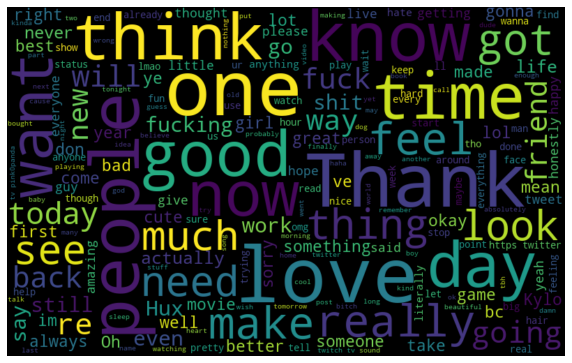

In [14]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
from google.colab import files
uploaded = files.upload()

Saving tweets_PTSD_PreDiagnosis.csv to tweets_PTSD_PreDiagnosis.csv


In [17]:
df_pre.head()

,Tweets,Username,date
0,My hero,IcyMcCool,Sun Sep 01 14:43:25 +0000 2019
1,Martin Lawrence Of Arabia,IcyMcCool,Sun Sep 01 02:36:39 +0000 2019
2,Diamonds Disrespectful,IcyMcCool,Fri Aug 30 01:35:42 +0000 2019
3,Trump Dawgs dont get discounts,IcyMcCool,Mon Aug 26 23:33:12 +0000 2019
4,Max keebles big mow.,IcyMcCool,Fri Aug 23 14:57:10 +0000 2019


In [0]:
pre_diag_words = ' '.join([text for text in df_pre['Tweets']])

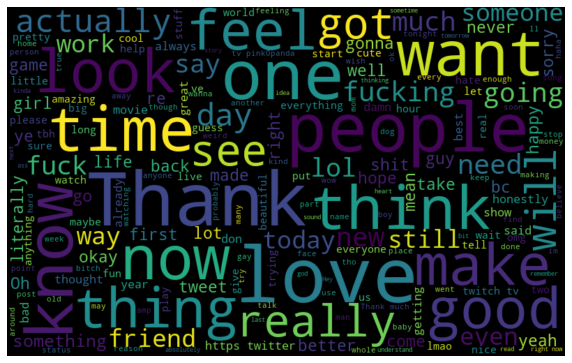

In [21]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()